# Versuch 2: Radioaktivität

(@everyone: please only write in the respective notebook that you are assigned to, to avoid merge conflicts)
(I will then put everything in a collective notebook for the advisors)

In [2]:
# I would recommend to get yourself the uncertainties package, otherwise you can comment all of this out
# https://pythonhosted.org/uncertainties/
from uncertainties import ufloat
from uncertainties.umath import *  # sin(), etc.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 2.1. Messung der Geigerzähler-Charakteristik

Zählrate (unkorrigiert von HGS!) gegen Spannung auftragen |
Zählraten-Fehler ergibt sich aus Poisson-Verteilung


jeweils 3x Messungen für 15 Sekunden |
erst ab 750V wurde etwas gemessen (daher die anderen Daten trivial) |
Zählrate wurde bei 1/min belassen

In [77]:
# x data
voltage = np.array([0,100,200,300,400,500,600,700,750,800,850,900,950,1000,1050,1100,1150,1200]) #volt
# y data
# averaging over 3 data points and their errors!
number_decacy_per_minute = np.array([ufloat(0,0),ufloat(0,0),ufloat(0,0),ufloat(0,0),
                                    ufloat(0,0),ufloat(0,0),ufloat(0,0),ufloat(0,0),
                                    np.mean([ufloat(8,np.sqrt(8)),ufloat(760,np.sqrt(760)),ufloat(1608,np.sqrt(1608))]),
                                    np.mean([ufloat(2788,np.sqrt(2788)),ufloat(2960,np.sqrt(2960)),ufloat(2788,np.sqrt(2788))]),
                                    np.mean([ufloat(2656,np.sqrt(2656)),ufloat(2680,np.sqrt(2680)),ufloat(2680,np.sqrt(2680))]),
                                    np.mean([ufloat(2852,np.sqrt(2852)),ufloat(2720,np.sqrt(2720)),ufloat(2868,np.sqrt(2868))]),
                                    np.mean([ufloat(3092,np.sqrt(3092)),ufloat(2984,np.sqrt(2984)),ufloat(3120,np.sqrt(3120))]),
                                    np.mean([ufloat(3116,np.sqrt(3116)),ufloat(3016,np.sqrt(3016)),ufloat(3060,np.sqrt(3060))]),
                                    np.mean([ufloat(3176,np.sqrt(3176)),ufloat(3188,np.sqrt(3188)),ufloat(3136,np.sqrt(3136))]),
                                    np.mean([ufloat(3372,np.sqrt(3372)),ufloat(3224,np.sqrt(3224)),ufloat(3088,np.sqrt(3088))]),
                                    np.mean([ufloat(3332,np.sqrt(3332)),ufloat(3212,np.sqrt(3212)),ufloat(3236,np.sqrt(3236))]),
                                    np.mean([ufloat(3316,np.sqrt(3316)),ufloat(3296,np.sqrt(3296)),ufloat(3428,np.sqrt(3428))]),
                                    ])

In [ ]:
# averaging over 3 data points and their errors!
#number_decays_per_minute_mean = np.array([0,0,0,0,0,0,0,0,np.mean([8,760,1608]), 
#                                     np.mean([2788,2960,2788]),np.mean([2656,2680,2904]),
#                                         np.mean([2852,2720,2868]),np.mean([3092,2984,3120]),
#                                         np.mean([3116,3016,3060]),np.mean([3176,3188,3136]),
#                                         np.mean([3372,3224,3088]),np.mean([3332,3212,3236]),
#                                         np.mean([3316,3296,3428])])

In [85]:
number_decacy_per_minute_mean_ufloat = np.zeros(len(number_decacy_per_minute))
number_decacy_per_minute_er_ufloat = np.zeros(len(number_decacy_per_minute))
for i in range(len(number_decacy_per_minute)):
    number_decacy_per_minute_mean_ufloat[i] = number_decacy_per_minute[i].n
for i in range(len(number_decacy_per_minute)):
    number_decacy_per_minute_er_ufloat[i] = number_decacy_per_minute[i].s

In [86]:
data = pd.DataFrame({"Spannung / V": voltage, "Zählrate / min$^{-1}$": number_decacy_per_minute_mean_ufloat, "Zählrate-Fehler / min$^{-1/2}$": number_decacy_per_minute_er_ufloat})
data

,Spannung / V,Zählrate / min$^{-1}$,Zählrate-Fehler / min$^{-1/2}$
0,0,0.000000,0.000000
1,100,0.000000,0.000000
2,200,0.000000,0.000000
3,300,0.000000,0.000000
4,400,0.000000,0.000000
5,500,0.000000,0.000000
6,600,0.000000,0.000000
7,700,0.000000,0.000000
8,750,792.000000,16.248077
9,800,2845.333333,30.796825


In [66]:
sns.color_palette("pastel")

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

In [63]:
print(sns.color_palette("pastel").as_hex())

['#a1c9f4', '#ffb482', '#8de5a1', '#ff9f9b', '#d0bbff', '#debb9b', '#fab0e4', '#cfcfcf', '#fffea3', '#b9f2f0']


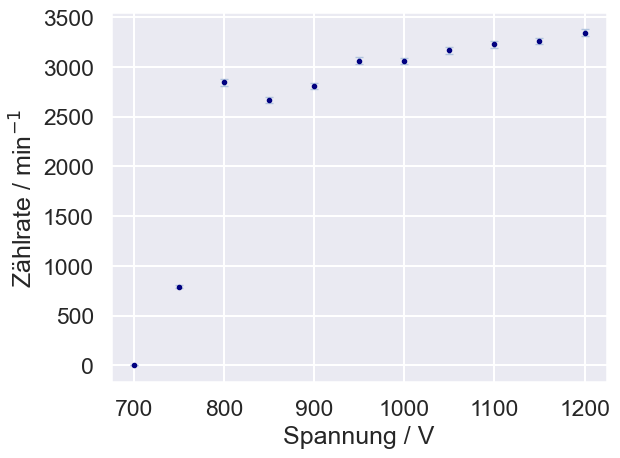

In [109]:
sns.set_theme(style="darkgrid")
sns.set_context("talk")
plt.xlabel("Spannung / V")
plt.ylabel( "Zählrate / min$^{-1}$")
plt.errorbar(x=voltage[7:], 
             y=number_decacy_per_minute_mean_ufloat[7:], 
             yerr=number_decacy_per_minute_er_ufloat[7:],markersize=6,
             fmt=".",color="navy", ecolor="lightsteelblue", elinewidth=2, capsize=3)

plt.savefig("Geigerzähler_Charakteristik.png", dpi = 500,bbox_inches='tight')
plt.show()

### 2.3. Halbwertszeit von Barium 137